In [62]:
# 결손데이터 개수 sum 가능
X.isna().sum()

상품명         0
성별구분        0
나이          0
계약기간월       0
정상이율        0
담보명         0
상환방법        0
상품분류        0
자금용도구분      0
직업          0
실행금액        0
연체이율        0
매회분할상환금     0
최종분할상환금     0
신용등급        0
월간근로소득금액    0
dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) # test 데이터가 20%

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=13)
rf_clf = RandomForestClassifier(random_state=13)
lr_clf = LogisticRegression()


# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.9083
RandomForestClassifier 정확도: 0.9237
LogisticRegression 정확도: 0.9286


C:\Users\fu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
# GridSearchCV로 결정트리분류의 최적 하이퍼 파라미터 찾고 예측 성능 측정.

# 단계1. CV에 5개 폴드세트 지정
# 단계2. max_depth, min_samples_split, min_samples_leaf 하이퍼 파라미터를 변경하면서 성능 측정
# 단계3. 최적 하이퍼 파라미터와 그때의 예측을 출력
# 단계4. 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측 수행.

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


# 하이퍼 파라미터 변경 전보다 약 8% 이상 증가했는데, 일반적으로 하이퍼 파라미터 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.
# -> 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보일 뿐이다.

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9344
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9286


In [67]:
# max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results를 통해 살펴볼 수 있다.

cv_results_df = pd.DataFrame(grid_dclf.cv_results_)

print(cv_results_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010593      0.000489         0.001200        0.000400   
1        0.009594      0.000490         0.001399        0.000490   
2        0.009194      0.000400         0.001799        0.000400   
3        0.009594      0.000490         0.001399        0.000490   
4        0.009393      0.000488         0.001400        0.000491   
5        0.009394      0.000799         0.001199        0.000400   
6        0.009394      0.000490         0.001399        0.000490   
7        0.009394      0.000490         0.001199        0.000400   
8        0.009194      0.000400         0.001399        0.000490   
9        0.012193      0.000400         0.001599        0.000490   
10       0.011593      0.000490         0.001400        0.000490   
11       0.012392      0.000491         0.001399        0.000489   
12       0.011793      0.000400         0.001399        0.000490   
13       0.011992      0.001094         0.001600

In [68]:
# 위의 것들 중에서, max_depth의 파라미터 값과 그 때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,2,0.933858
1,2,0.933858
2,2,0.933858
3,2,0.933858
4,2,0.933858
5,2,0.933858
6,2,0.933858
7,2,0.933858
8,2,0.933858
9,3,0.933631


In [69]:
# 마지막으로, max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해 보겠다.
params = { 
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.9342
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 24}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [70]:
# 테스트 데이터 세트에 위에서 학습한 해당 하이퍼 파라미터를 적용해본다
best_df_clf = grid_cv.best_estimator_   # GridSearchCV의 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min~ 16으로 학습이 완료된 Estimator 객체이다.
pred1 = best_df_clf.predict(X_test)   # 바로 앞 함수 이어서......
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9298


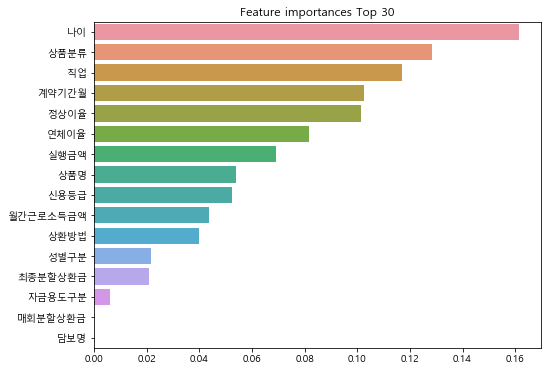

In [73]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)   # 시리즈로 변환

# 중요도 값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

# 시각화 구현
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 30') # Top 20인데, 30으로 오타
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, dt_pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

roc_score = roc_auc_score(y_test, lr_pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

roc_score = roc_auc_score(y_test, rf_pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.5478
ROC AUC 값: 0.5000
ROC AUC 값: 0.5306


In [94]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):   # pred_proba_c1 새로이 추가
    # thresholds list객체 내의 값을 차례로 iteration(반복)하면서 Evauation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  # fit으로 x_test 값에 해당하는 pred_proba_c1 사용
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)   # 값 반환.

임곗값: 0.4
오차 행렬
[[3020   48]
 [ 236    0]]
정확도: 0.9140, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
임곗값: 0.45
오차 행렬
[[3068    0]
 [ 236    0]]
정확도: 0.9286, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
임곗값: 0.5
오차 행렬
[[3068    0]
 [ 236    0]]
정확도: 0.9286, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
임곗값: 0.55
오차 행렬
[[3068    0]
 [ 236    0]]
정확도: 0.9286, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
임곗값: 0.6
오차 행렬
[[3068    0]
 [ 236    0]]
정확도: 0.9286, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000


C:\Users\fu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarni

C:\Users\fu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


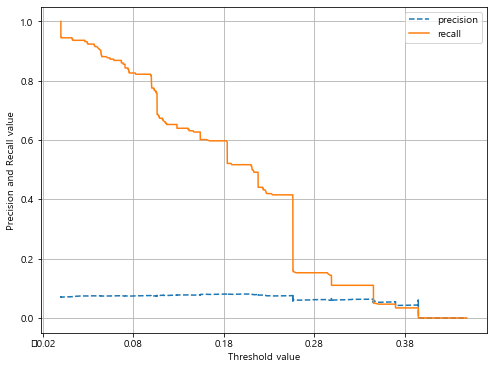

In [96]:
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1 )
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') # 정밀도는 점선으로 표시
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1])  # [:,1] 는 index 범위 지정

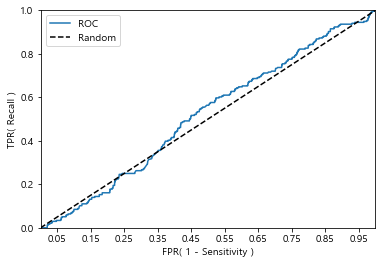

In [98]:
from sklearn.metrics import roc_curve


# FPR, TPR 임곗값 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])